In [1]:
# Regular EDA (exploration data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# use pandas to load data into a DataFrame
df = pd.read_csv("/home/danielbudi/Collage/comp-gammafest/comp-model/comp-dataset/train.csv")
df.shape # (rows, columns)

(35973, 40)

In [3]:
target_column = 'DC201'

In [4]:
df.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum


In [5]:
df[target_column].replace(to_replace={'Layak Minum':1, 'Tidak Layak Minum':0}, inplace=True)
df.drop('id', axis=1, inplace=True)

In [6]:
# Potability is the target variable, how many of each class are there?
df[target_column].value_counts()

DC201
1.0    32398
0.0     3572
Name: count, dtype: int64

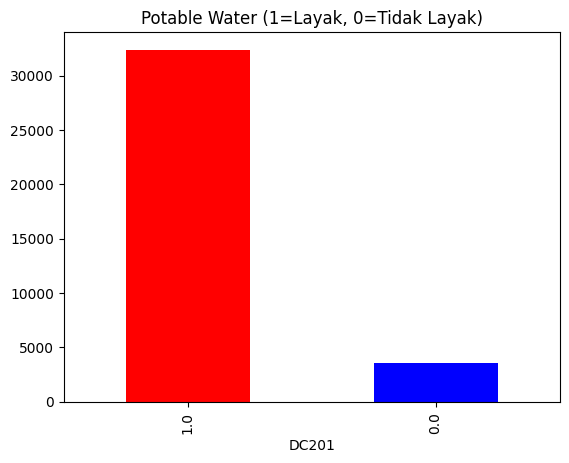

In [7]:
df[target_column].value_counts().plot(kind="bar", color=["red", "blue"], title = "Potable Water (1=Layak, 0=Tidak Layak)");

In [8]:
(32398/(32398+3572))*100 # jumlah persenan imbalance

90.06950236308035

In [9]:
32398-3572 # jumlah data imbalance

28826

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DC024   35973 non-null  int64  
 1   DC025   35973 non-null  int64  
 2   DC205   35962 non-null  float64
 3   DC206   35952 non-null  float64
 4   DC207   35929 non-null  float64
 5   DC208   35960 non-null  float64
 6   DC209   35955 non-null  float64
 7   DC210   35932 non-null  float64
 8   DC211   35949 non-null  float64
 9   DC212   35949 non-null  float64
 10  DC213   35896 non-null  float64
 11  DC214   35964 non-null  float64
 12  DC215   35959 non-null  float64
 13  DC216   35934 non-null  float64
 14  DC217   35973 non-null  int64  
 15  DC219   35973 non-null  int64  
 16  DC220   35969 non-null  float64
 17  DC226   35967 non-null  float64
 18  DC230a  35962 non-null  float64
 19  DC230b  32964 non-null  float64
 20  DC232   32949 non-null  float64
 21  DC232b  32949 non-null  float64
 22

In [11]:
df.describe() # bisa melihat variabel 'count' terkecil untuk mengetahui berapa banyak data yang NaN
# count terkecil terletak pada Sulfate 2945

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
count,35973.000000,35973.000000,35962.000000,35952.000000,35929.000000,35960.000000,35955.000000,35932.000000,35949.000000,35949.000000,...,35936.000000,35361.000000,30599.000000,35969.000000,35964.000000,35959.000000,35973.000000,35962.000000,35921.000000,35970.000000
mean,43.229088,1.468601,14.986736,0.960086,0.189234,0.846858,0.569434,0.326700,0.758547,0.132605,...,0.198687,1.167303,0.826922,0.366288,0.379574,1.207014,2.699330,15.498637,82.668216,0.900695
std,23.585684,0.499020,6.061058,0.195761,0.391700,0.360130,0.495162,0.469013,0.427970,0.339152,...,0.425478,0.457907,0.378320,0.481796,0.485288,1.228101,1.435673,9.598043,91.194377,0.299075
min,11.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,0.000000
25%,31.000000,1.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000,42.000000,1.000000
50%,35.000000,1.000000,12.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,11.000000,63.000000,1.000000
75%,64.000000,2.000000,16.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,12.000000,96.000000,1.000000
max,94.000000,2.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8.000000,6.000000,1.000000,1.000000,1.000000,4.000000,5.000000,96.000000,998.000000,1.000000


In [12]:
column_list = list(df.columns)
column_list = column_list[:-1]
column_list

['DC024',
 'DC025',
 'DC205',
 'DC206',
 'DC207',
 'DC208',
 'DC209',
 'DC210',
 'DC211',
 'DC212',
 'DC213',
 'DC214',
 'DC215',
 'DC216',
 'DC217',
 'DC219',
 'DC220',
 'DC226',
 'DC230a',
 'DC230b',
 'DC232',
 'DC232b',
 'DC235',
 'DC237',
 'DC237a',
 'DC237b',
 'DC237c',
 'DC237d',
 'DC237e',
 'DC237f',
 'DC241',
 'DC242',
 'DC244',
 'DC246',
 'DC252',
 'DC270a',
 'DC109',
 'DC142a']

### Convert Label

In [13]:
except_column = ['DC216', 'DC220', 'DC142a']
df_copy = df.copy()

ori_value = []
for column in column_list:
    if column not in except_column:
        i = 0
        for value in np.sort(df_copy[column].unique()):
            if not np.isnan(value):
                ori_value.append(f"{column} : {value} -> {i}")
                df_copy[column].replace(to_replace={value:i}, inplace=True)
                i += 1
                
for column in column_list:
    if column not in except_column:
        print(column,"",np.sort(df_copy[column].unique()))

DC024  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
DC025  [0 1]
DC205  [ 0.  1.  2.  3.  4.  5. nan]
DC206  [ 0.  1. nan]
DC207  [ 0.  1. nan]
DC208  [ 0.  1. nan]
DC209  [ 0.  1. nan]
DC210  [ 0.  1. nan]
DC211  [ 0.  1. nan]
DC212  [ 0.  1. nan]
DC213  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. nan]
DC214  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. nan]
DC215  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. nan]
DC217  [0 1 2 3 4 5]
DC219  [0 1]
DC226  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
DC230a  [ 0.  1.  2.  3.  4. nan]
DC230b  [ 0.  1. nan]
DC232  [ 0.  1. nan]
DC232b  [ 0.  1. nan]
DC235  [ 0.  1.  2. nan]
DC237  [ 0.  1.  2. nan]
DC237a  [ 0.  1.  2. nan]
DC237b  [ 0.  1.  2. nan]
DC237c  [ 0.  1.  2. nan]
DC237d  [ 0.  1.  2. nan]
DC237e  [ 0.  1.  2. nan]
DC237f  [ 0.  1.  2. nan]
DC241  [ 0.  1.  2.  3. nan]
DC242  [ 0.  1. nan]
DC244  [ 0.  1. nan]
DC246  [ 0.  1. nan]
DC252  [ 0.  1. 

In [24]:
with open('ori-values.txt', 'w') as f:
    for line in ori_value:
        f.write(f"{line}\n")

In [25]:
df_copy.to_csv('comp-dataset/mapped_data.csv', index=False)

### klasifikasi akan susah dilakukan jika box plot mirip. Contoh boxplot yang bagus adalah iris dataset.
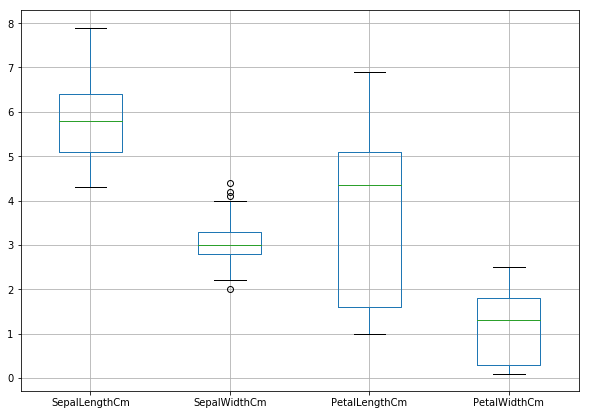

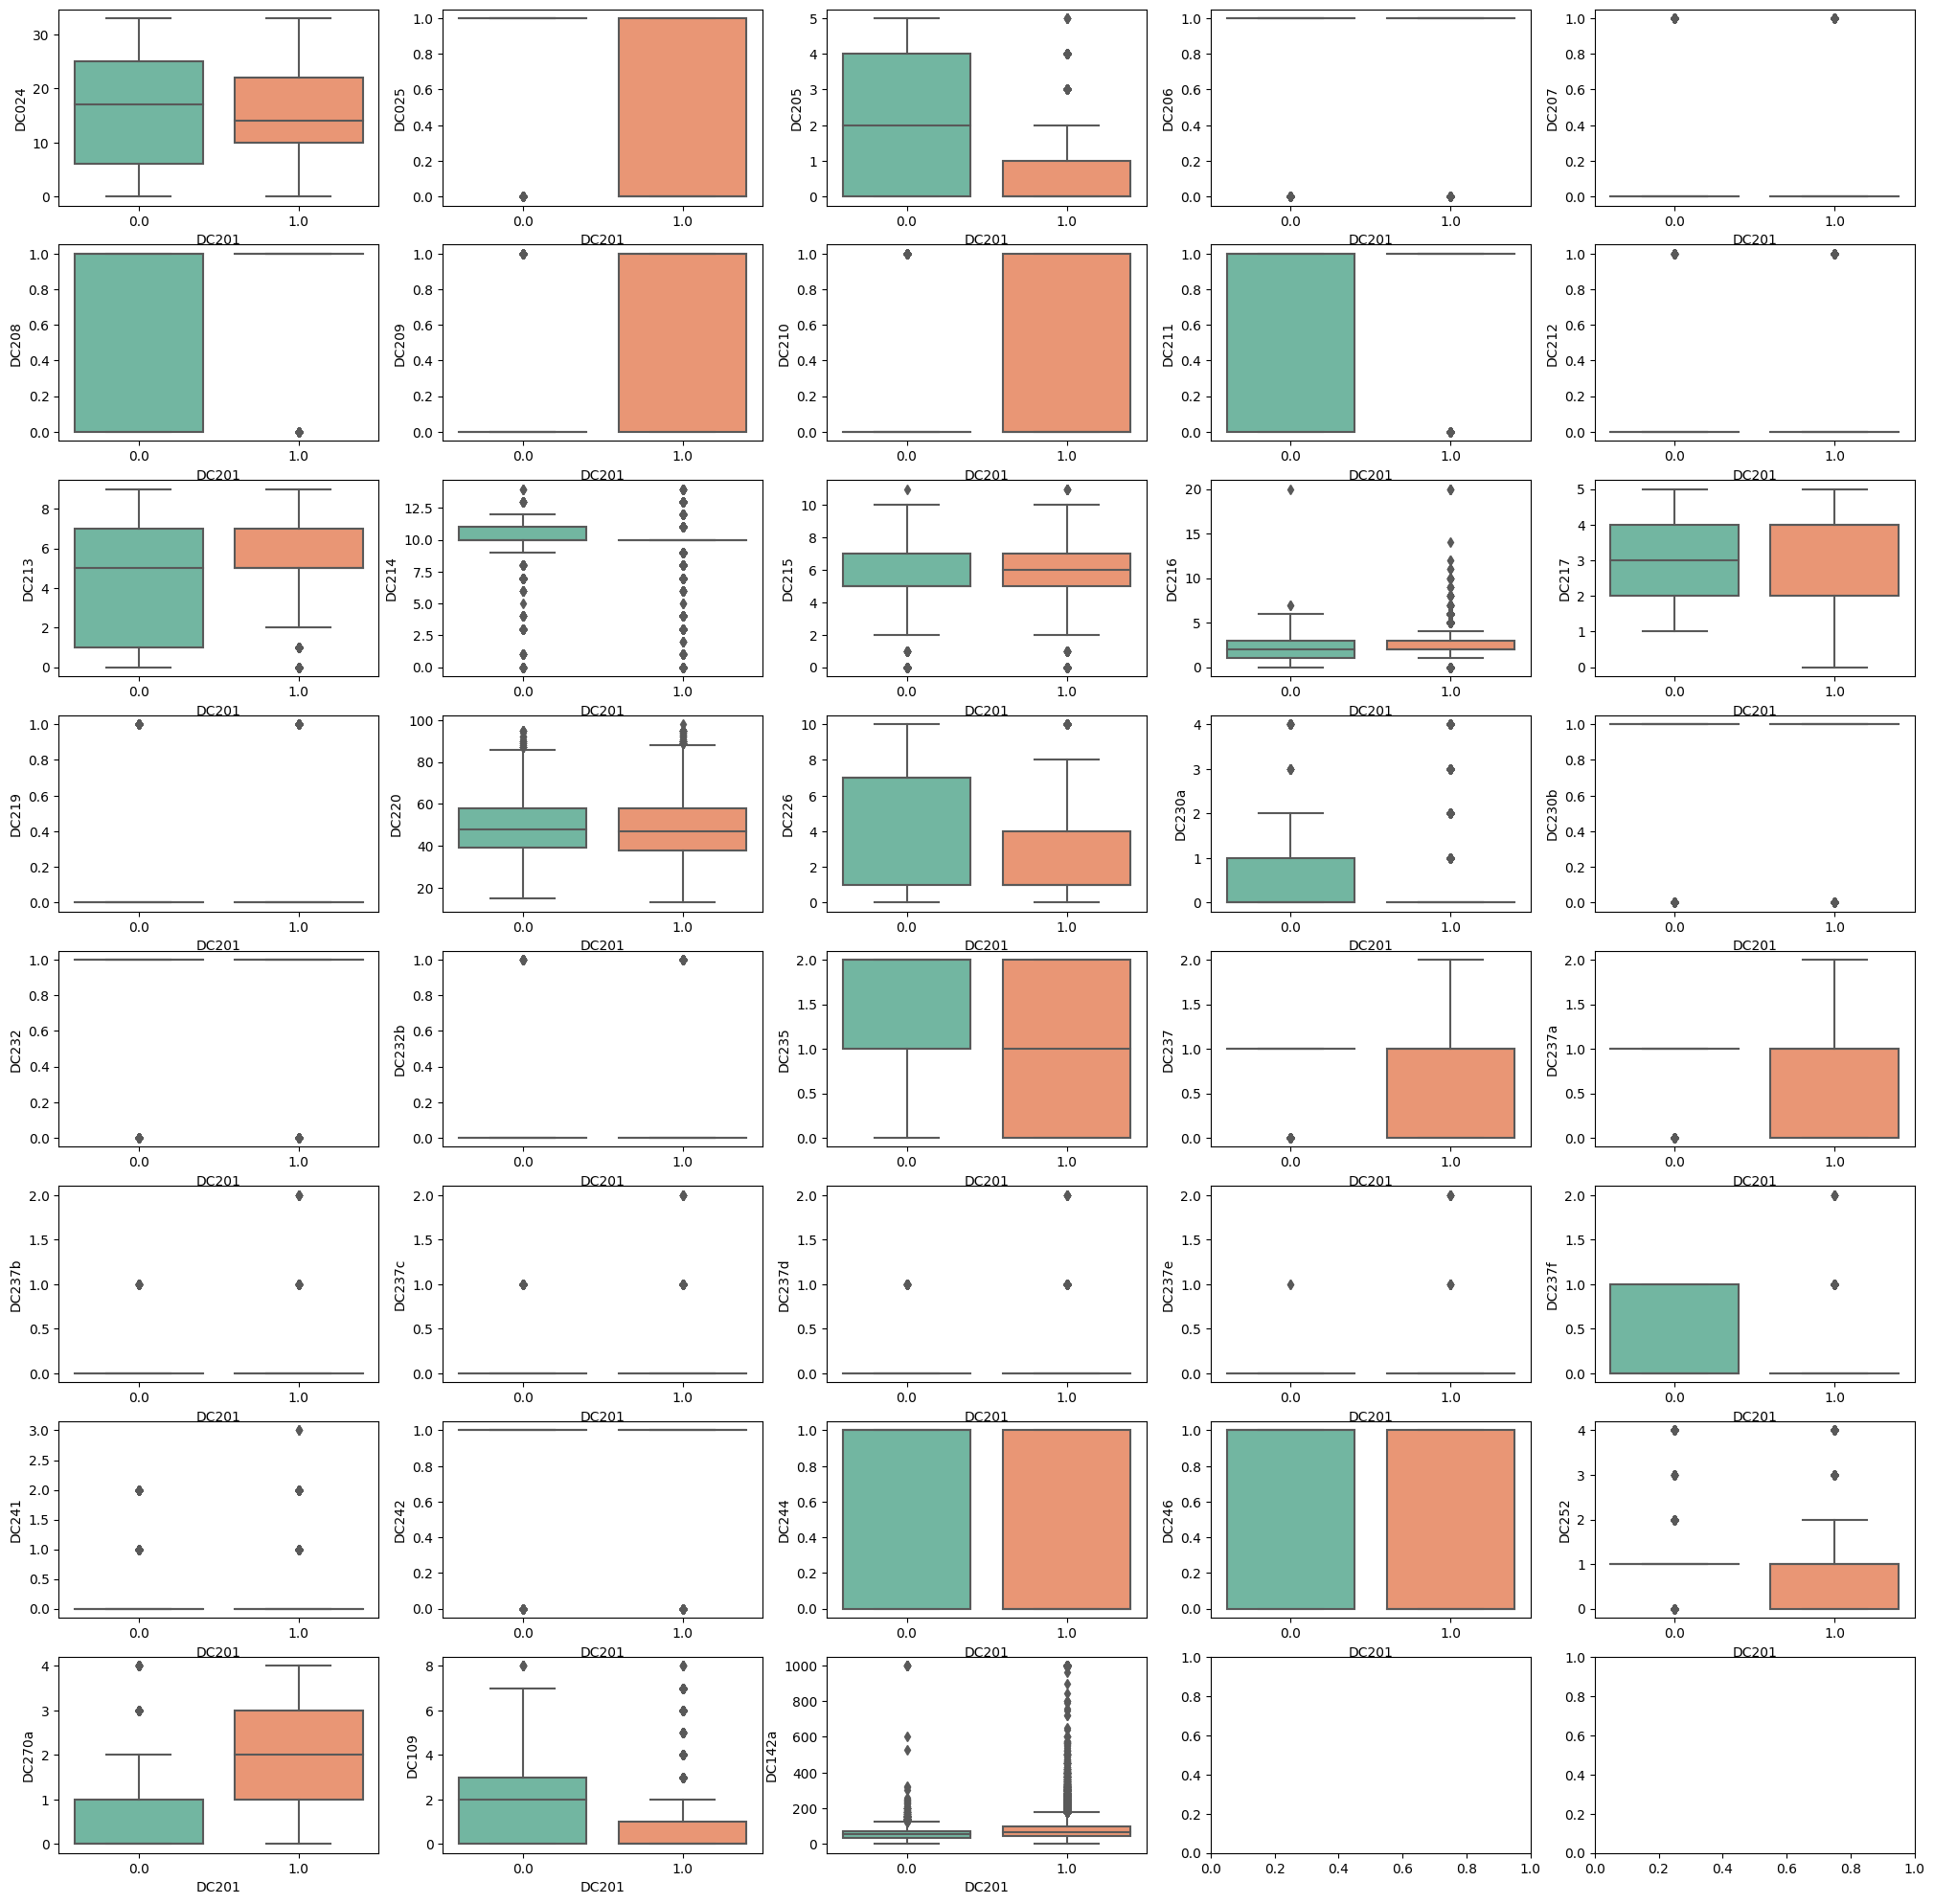

In [26]:
row, col = 8, 5
fig, axes = plt.subplots(row, col, figsize=(25, 25))
i, j = 0, 0
for z, column in enumerate(column_list):
    sns.boxplot(ax=axes[i,j], data=df_copy, palette="Set2", x=target_column, y=column_list[z])
    if j == col-1:
        j = 0
        i += 1
    else:
        j += 1

### Distribusi data setiap fitur dengan histograms

In [27]:
target_list = df_copy[target_column].value_counts()
target_list = target_list.index.tolist()
target_list

[1.0, 0.0]

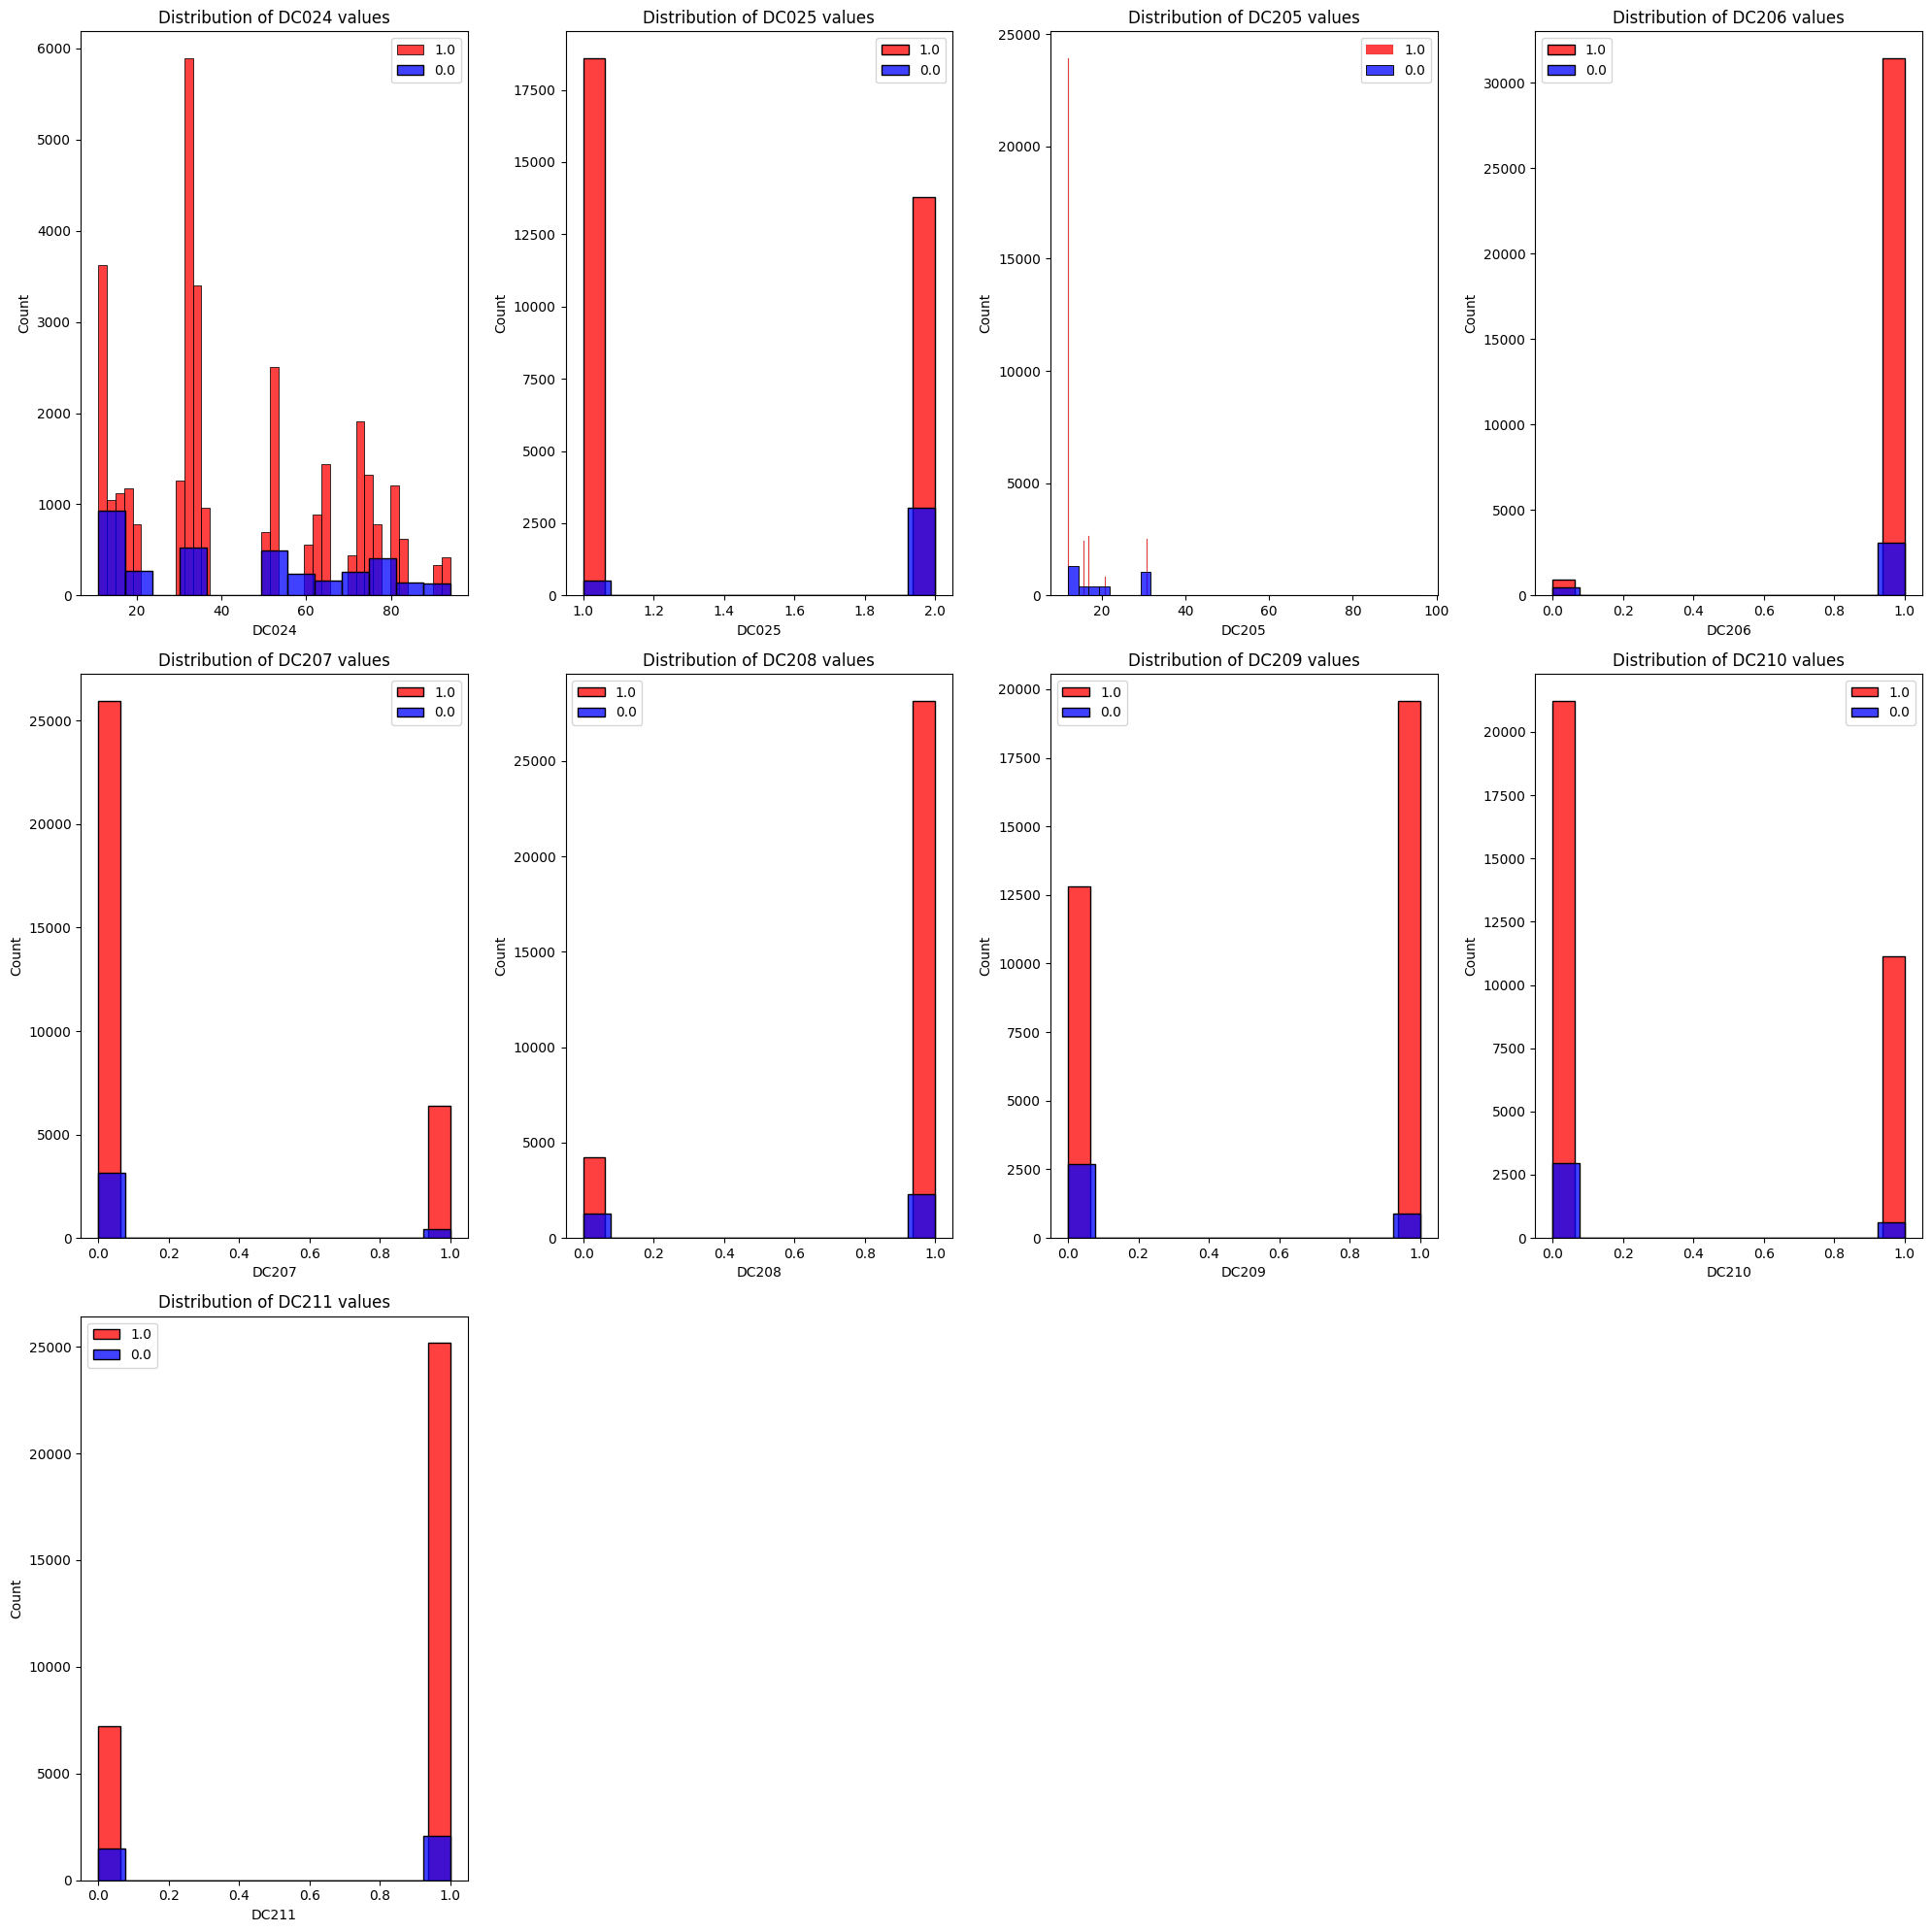

In [28]:
# Distribution of features

target_value = []

for target in target_list:
    query = str(target_column) + ' == ' + str(target)
    target_value.append(df.query(query))

# colors = ['salmon', 'red', 'blue', 'lightblue', 'orange', 'black', 'gray', 'pink', 'navy', 'white']
colors = ['red', 'blue']

fig = plt.figure(figsize=(20,20))

for ax,column in enumerate(df.columns[:9]):
    plt.subplot(3,4,ax+1)
    plt.title(f'Distribution of {column} values')
    for i, target in enumerate(target_value):
        sns.histplot(x=target[column],label=target_list[i], color=colors[i])    
    plt.legend(prop=dict(size=10))

    
plt.tight_layout()

### Correlation Matrix

- apakah variable punya ketergantungan atau tidak
- Kalo korelasinya 1: berkorelasi, negatif: tidak ada korelasinya 
- BAGUS KALO POSITIF ATAU NEGATIF, KALO 0 → tidak ada korelasinya

#### Correlation Matrix yang baik

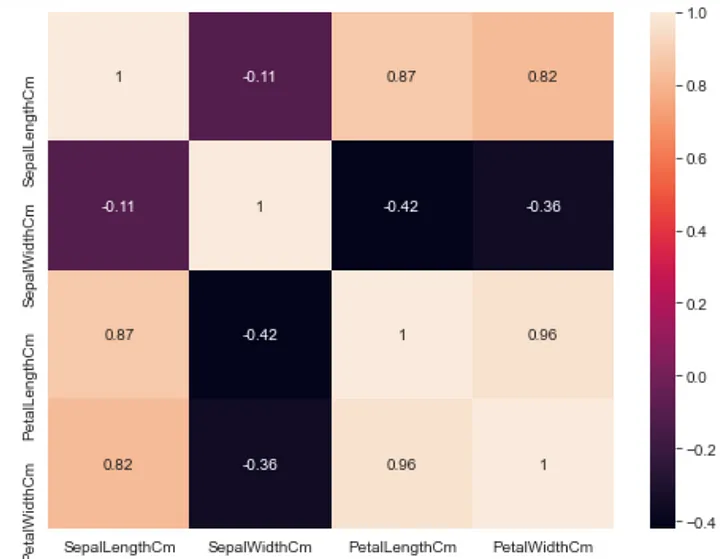

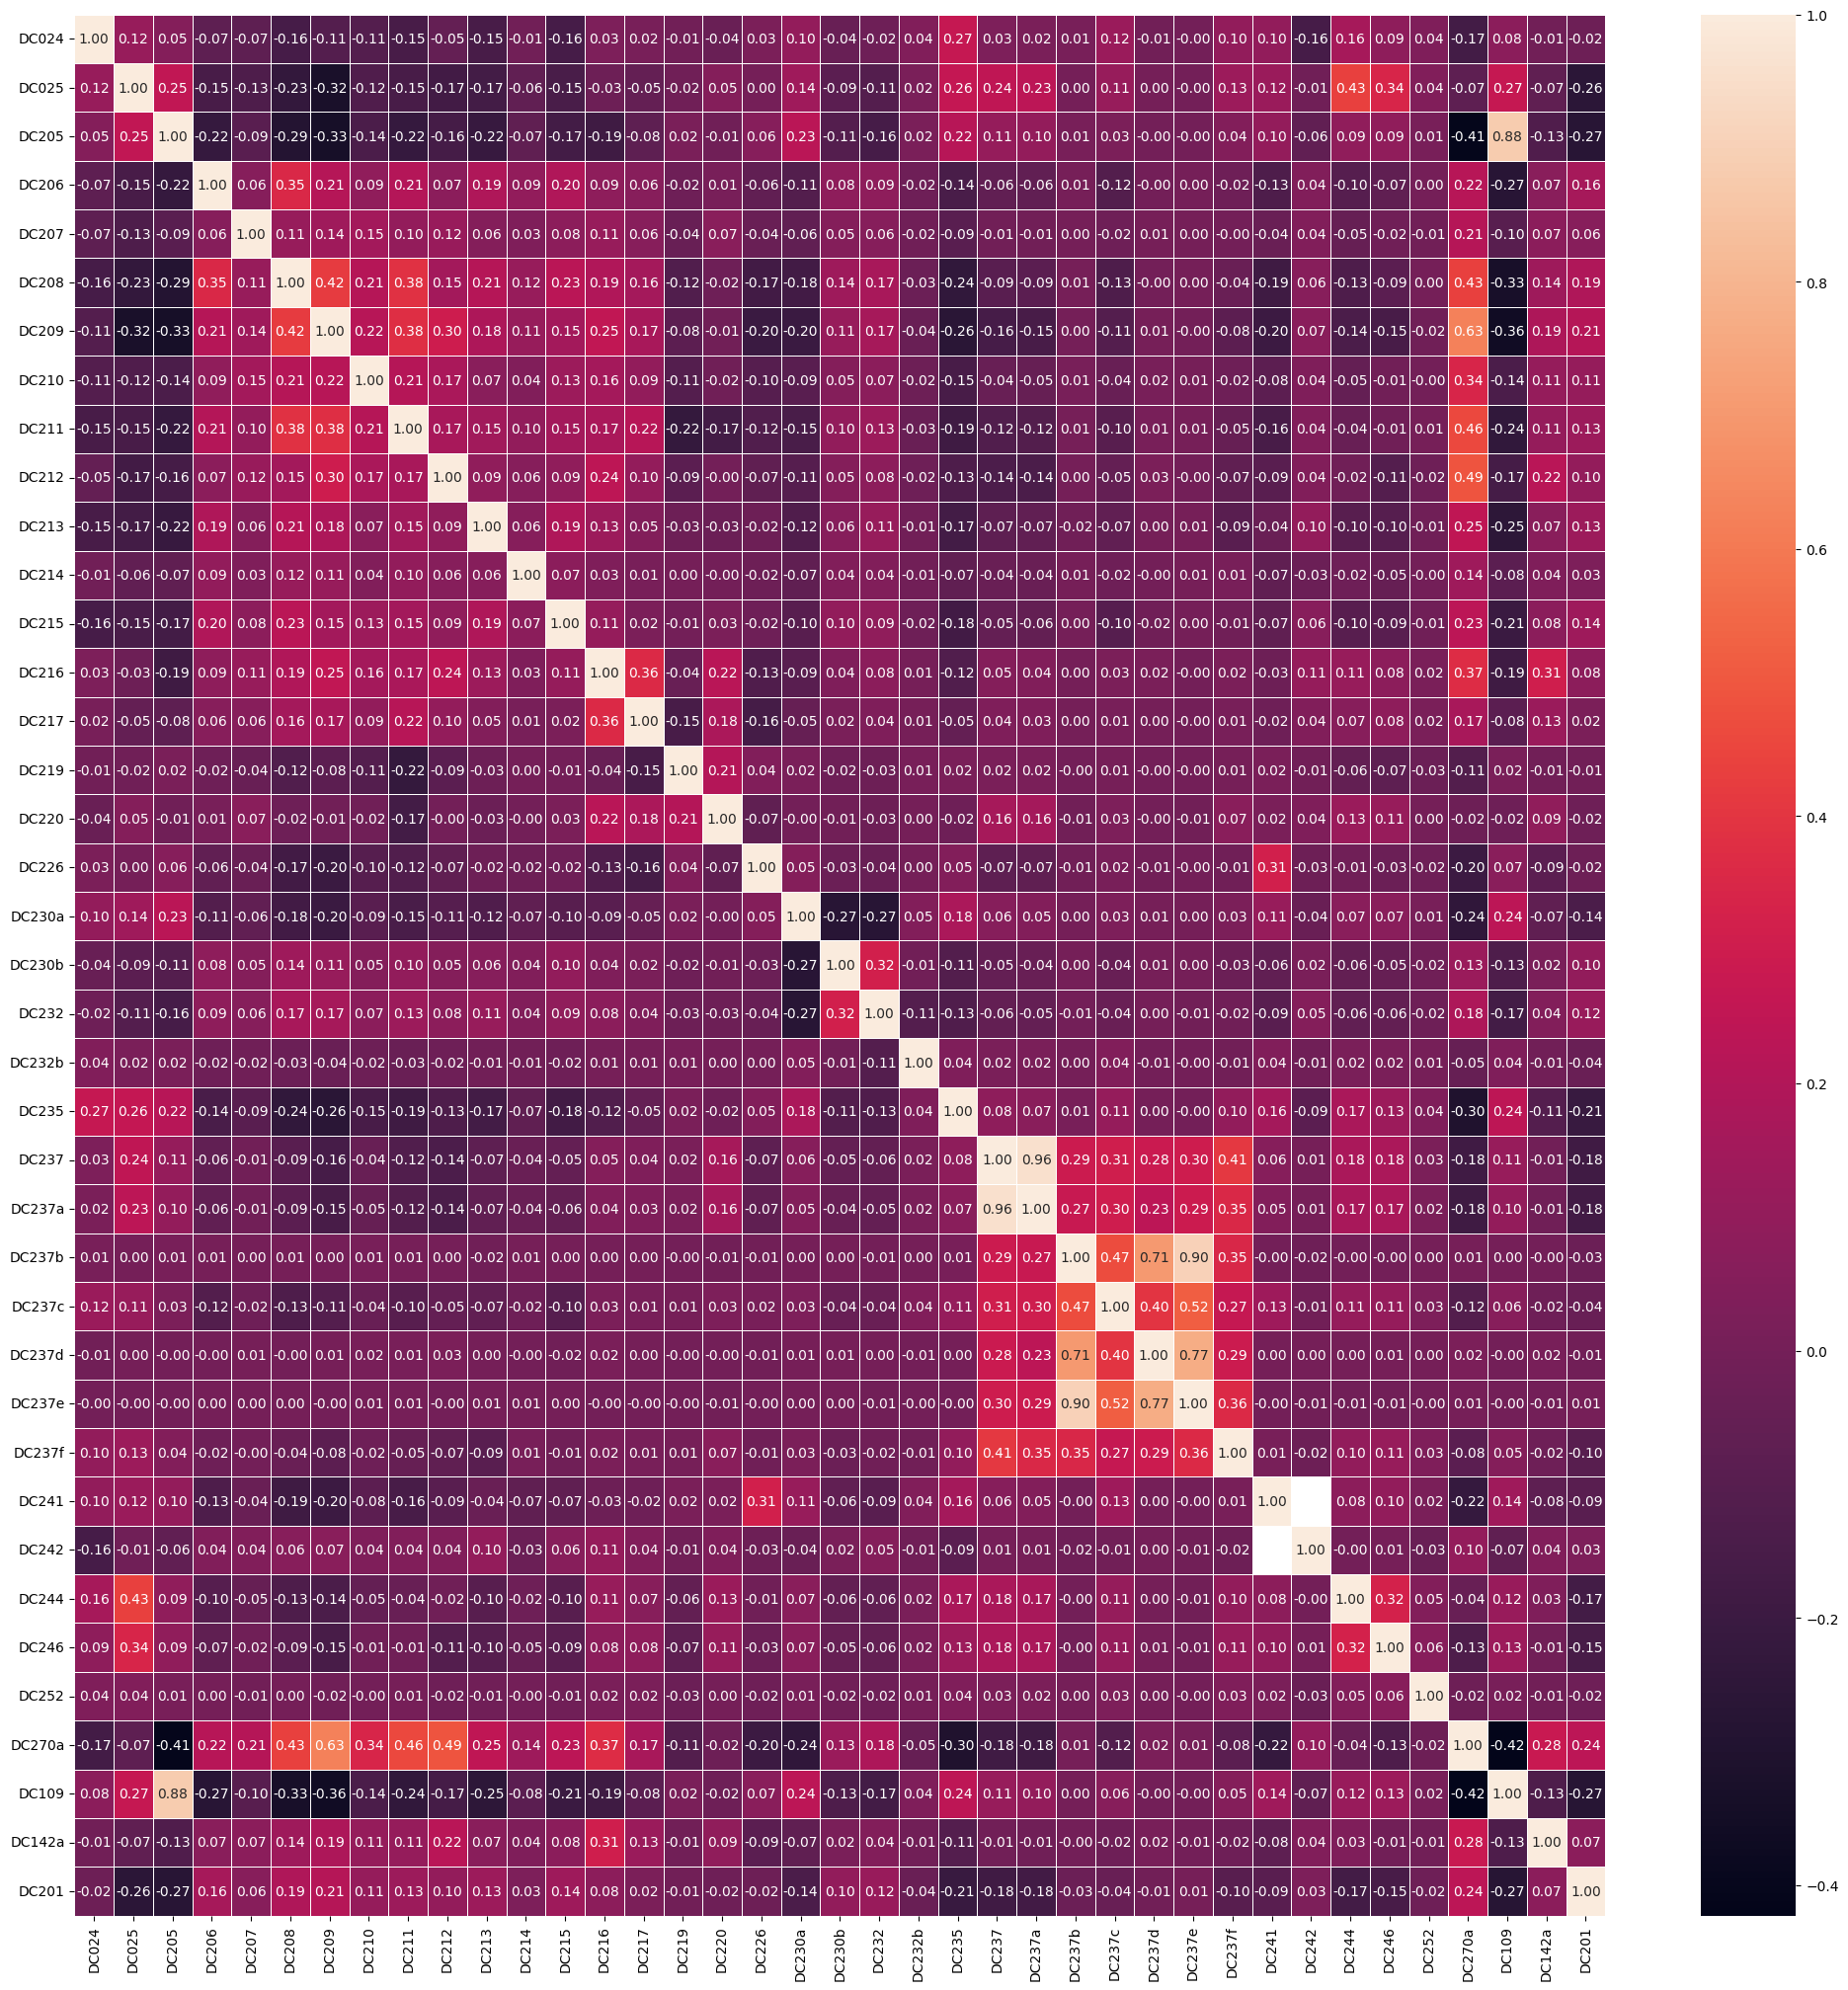

In [19]:
# Use Seaborn to make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f")

### Scatter Plot

Melihat pesebaran data dengan x_axis=Sulfate dan y_axis=Solids, karena meliaht korelasi dari data tersebut

<Axes: xlabel='DC209', ylabel='DC270a'>

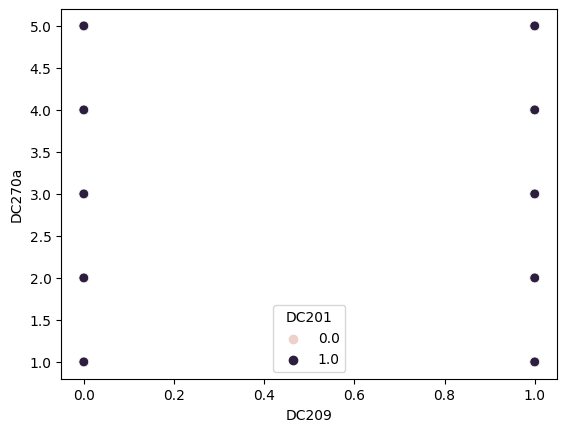

In [20]:
sns.scatterplot(x=df['DC209'], y=df['DC270a'], hue=df['DC201'], s=50)